In [15]:
import numpy as np
import matplotlib.pyplot as plt

import nengo
from nengo.processes import WhiteNoise
from nengo.dists import Uniform


ImportError: cannot import name 'product' from 'numpy' (/Users/arjun/.pyenv/versions/3.11/envs/neuromatch/lib/python3.11/site-packages/numpy/__init__.py)

# Plotting a tuning curve 

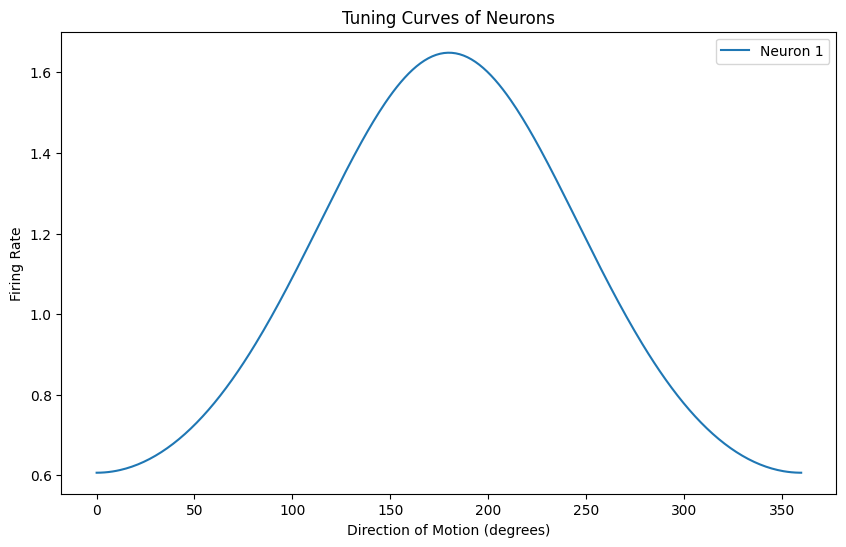

In [9]:
# Example parameters
num_neurons = 1
directions = np.linspace(0, 360, 360)

# Generate tuning curves
preferred_directions = np.linspace(0, 360, num_neurons, endpoint=False)
tuning_curves = np.exp(-0.5 * np.cos(np.radians(directions[:, np.newaxis] - preferred_directions)))

# Plot tuning curves
plt.figure(figsize=(10, 6))
for i in range(num_neurons):
    plt.plot(directions, tuning_curves[:, i], label=f'Neuron {i+1}')
plt.xlabel('Direction of Motion (degrees)')
plt.ylabel('Firing Rate')
plt.title('Tuning Curves of Neurons')
plt.legend()
plt.show()

## Exploring Firing Rate Models

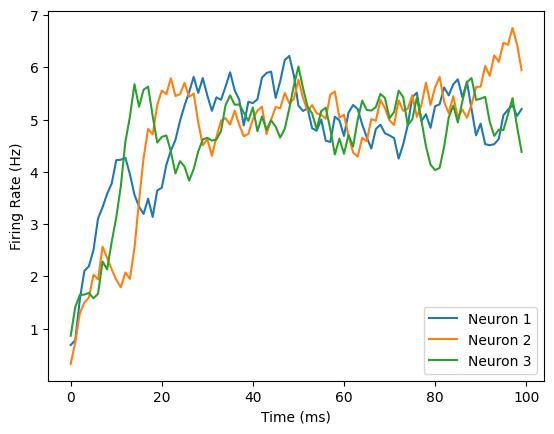

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class FiringRateModel:
    def __init__(self, num_neurons, tau, weight_matrix, transfer_function):
        """
        Initialize the Firing Rate Model.

        Parameters:
        - num_neurons: Number of neurons in the population.
        - tau: Time constant (ms).
        - weight_matrix: Synaptic weight matrix (NxN).
        - transfer_function: Transfer function to convert input to firing rate.
        """
        self.num_neurons = num_neurons
        self.tau = tau
        self.weights = weight_matrix
        self.transfer_function = transfer_function
        self.firing_rates = np.zeros(num_neurons)
    
    def update_firing_rates(self, external_input, dt):
        """
        Update the firing rates of the neurons.

        Parameters:
        - external_input: External input to the neurons (1D array of length N).
        - dt: Time step for the simulation (ms).
        """
        input_current = external_input + np.dot(self.weights, self.firing_rates)
        delta_r = (-self.firing_rates + self.transfer_function(input_current)) * dt / self.tau
        self.firing_rates += delta_r

    def simulate(self, external_inputs, total_time, dt):
        """
        Simulate the firing rate dynamics over time.

        Parameters:
        - external_inputs: External inputs over time (2D array of shape (num_time_steps, num_neurons)).
        - total_time: Total time of the simulation (ms).
        - dt: Time step for the simulation (ms).

        Returns:
        - firing_rate_history: History of firing rates over time (2D array of shape (num_time_steps, num_neurons)).
        """
        num_time_steps = int(total_time / dt)
        firing_rate_history = np.zeros((num_time_steps, self.num_neurons))

        for t in range(num_time_steps):
            self.update_firing_rates(external_inputs[t], dt)
            firing_rate_history[t] = self.firing_rates

        return firing_rate_history

def relu(x):
    """ReLU transfer function."""
    return np.maximum(0, x)

# Example usage
if __name__ == "__main__":
    num_neurons = 3
    tau = 10  # ms
    weight_matrix = np.array([
        [0, 1, -1],
        [-1, 0, 1],
        [1, -1, 0]
    ])
    transfer_function =  relu
    model = FiringRateModel(num_neurons, tau, weight_matrix, transfer_function)

    total_time = 100  # ms
    dt = 1  # ms
    external_inputs = np.random.rand(int(total_time / dt), num_neurons) * 10  # Random external inputs

    firing_rate_history = model.simulate(external_inputs, total_time, dt)

    # Plot the firing rates over time
    time = np.arange(0, total_time, dt)
    plt.figure()
    for i in range(num_neurons):
        plt.plot(time, firing_rate_history[:, i], label=f'Neuron {i+1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Firing Rate (Hz)')
    plt.legend()
    plt.show()

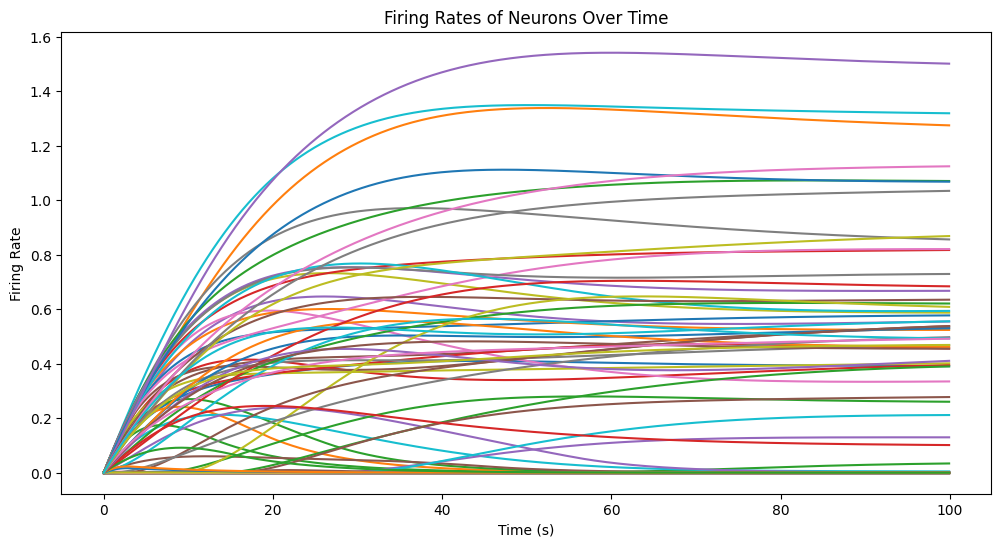

In [10]:
N = 100  # Number of neurons
time_steps = 1000  # Simulation time steps
dt = 0.1  # Time step size
tau = 10.0  # Time constant
preferred_directions = np.linspace(0, 2 * np.pi, N, endpoint=False)

# External stimulus parameters
stimulus_direction = np.pi / 4  # Direction of moving dots (45 degrees)
stimulus_coherence = 0.8  # Coherence of the motion

# Synaptic weight matrix (recurrent connections)
W = np.random.randn(N, N) * 0.1  # Small random weights for recurrent connections

# Initialize firing rates
firing_rates = np.zeros((N, time_steps))

# Stimulus input to neurons
def stimulus_input(t, direction, coherence):
    return coherence * np.cos(preferred_directions - direction)

# Neuron activation function (e.g., linear threshold)
def activation_function(x):
    return np.maximum(0, x)

# Simulation loop
for t in range(1, time_steps):
    external_input = stimulus_input(t * dt, stimulus_direction, stimulus_coherence)
    recurrent_input = np.dot(W, firing_rates[:, t-1])
    total_input = external_input + recurrent_input
    firing_rates[:, t] = firing_rates[:, t-1] + (dt / tau) * (-firing_rates[:, t-1] + activation_function(total_input))

# Plotting the results
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(np.arange(time_steps) * dt, firing_rates[i], label=f'Neuron {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')
plt.title('Firing Rates of Neurons Over Time')
plt.show()

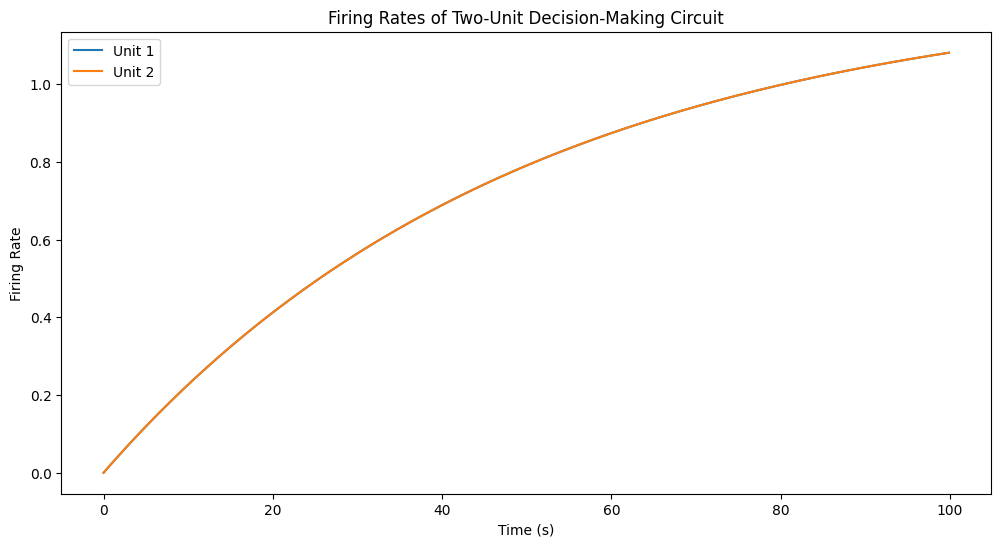

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_steps = 1000  # Simulation time steps
dt = 0.1  # Time step size
tau = 20.0  # Time constant
w_EE = 1.6  # Excitatory weight
w_IE = 1.0  # Inhibitory weight
I_ext1 = 0.5  # External input to unit 1
I_ext2 = 0.5  # External input to unit 2

# Initialize firing rates
r1 = np.zeros(time_steps)
r2 = np.zeros(time_steps)

# Activation function (e.g., linear threshold)
def activation_function(x):
    return np.maximum(0, x)

# Simulation loop
for t in range(1, time_steps):
    dr1 = (dt / tau) * (-r1[t-1] + activation_function(w_EE * r1[t-1] - w_IE * r2[t-1] + I_ext1))
    dr2 = (dt / tau) * (-r2[t-1] + activation_function(w_EE * r2[t-1] - w_IE * r1[t-1] + I_ext2))

    r1[t] = r1[t-1] + dr1
    r2[t] = r2[t-1] + dr2

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(time_steps) * dt, r1, label='Unit 1')
plt.plot(np.arange(time_steps) * dt, r2, label='Unit 2')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')
plt.title('Firing Rates of Two-Unit Decision-Making Circuit')
plt.legend()
plt.show()

In [14]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="2D Decision Integrator", seed=11)

with model:
    # Inputs
    input1 = nengo.Node(-0.5, label="Input 1")
    input2 = nengo.Node(0.5, label="Input 2")

    # Ensembles
    ens_inp = nengo.Ensemble(100, dimensions=2, label="Input")
    MT = nengo.Ensemble(100, dimensions=2, noise=WhiteNoise(dist=Uniform(-0.3, 0.3)))
    LIP = nengo.Ensemble(200, dimensions=2, noise=WhiteNoise(dist=Uniform(-0.3, 0.3)))
    ens_out = nengo.Ensemble(
        100,
        dimensions=2,
        intercepts=Uniform(0.3, 1),
        noise=WhiteNoise(dist=Uniform(-0.3, 0.3)),
        label="Output",
    )

    weight = 0.1
    # Connecting the input signal to the input ensemble
    nengo.Connection(input1, ens_inp[0], synapse=0.01)
    nengo.Connection(input2, ens_inp[1], synapse=0.01)

    # Providing input to MT ensemble
    nengo.Connection(ens_inp, MT, synapse=0.01)

    # Connecting MT ensemble to LIP ensemble
    nengo.Connection(MT, LIP, transform=weight, synapse=0.1)

    # Connecting LIP ensemble to itself
    nengo.Connection(LIP, LIP, synapse=0.1)

    # Connecting LIP population to output
    nengo.Connection(LIP, ens_out, synapse=0.01)

NameError: name 'nengo' is not defined